In [1]:
import pandas as pd
import numpy as np
import cv2
import random 
import re 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
i=0
labelname = []
images = []
images_path = []
images_pixels = []
labels =[]

In [3]:
path = "./data"
for directory in os.listdir(path):
    labelname.append(directory)
    for img in os.listdir(os.path.join(path,directory)):
        if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
            img_path = os.path.join(os.path.join(path,directory),img)
            images.append(img)
            images_path.append(img_path)
            img_pix = cv2.imread(img_path,1)
            images_pixels.append(cv2.resize(img_pix,(180,180)))
            labels.append(i)
    i= i+1

print("Total Labels: ", len(labels))
print("Total images: ", len(images))
print("Total output: ", len(labelname))
print("Total images_pixels: ", len(images_pixels))

Total Labels:  17760
Total images:  17760
Total output:  2
Total images_pixels:  17760


In [4]:
shuff = list(zip(images_pixels,labels))
random.shuffle(shuff)
train_data, labels_data = zip(*shuff)

In [5]:
x_data = np.array(train_data)
x_data[0]

array([[[114, 135, 150],
        [114, 135, 151],
        [119, 141, 158],
        ...,
        [ 45,  43,  38],
        [ 45,  43,  38],
        [ 45,  43,  38]],

       [[114, 135, 150],
        [115, 136, 151],
        [119, 142, 158],
        ...,
        [ 45,  43,  38],
        [ 45,  43,  38],
        [ 45,  43,  38]],

       [[117, 138, 153],
        [117, 138, 154],
        [121, 144, 160],
        ...,
        [ 44,  42,  37],
        [ 45,  44,  38],
        [ 45,  44,  39]],

       ...,

       [[ 38,  31,  25],
        [ 38,  31,  25],
        [ 38,  31,  25],
        ...,
        [ 37,  21,  14],
        [ 37,  21,  14],
        [ 37,  21,  14]],

       [[ 38,  31,  25],
        [ 38,  31,  25],
        [ 38,  31,  25],
        ...,
        [ 36,  21,  14],
        [ 37,  22,  15],
        [ 37,  22,  15]],

       [[ 38,  31,  25],
        [ 38,  31,  25],
        [ 38,  31,  25],
        ...,
        [ 37,  21,  14],
        [ 37,  22,  15],
        [ 37,  22,  15]]

In [6]:
y_data = np.array(labels_data)
y_data[0:5]

array([0, 1, 0, 1, 0])

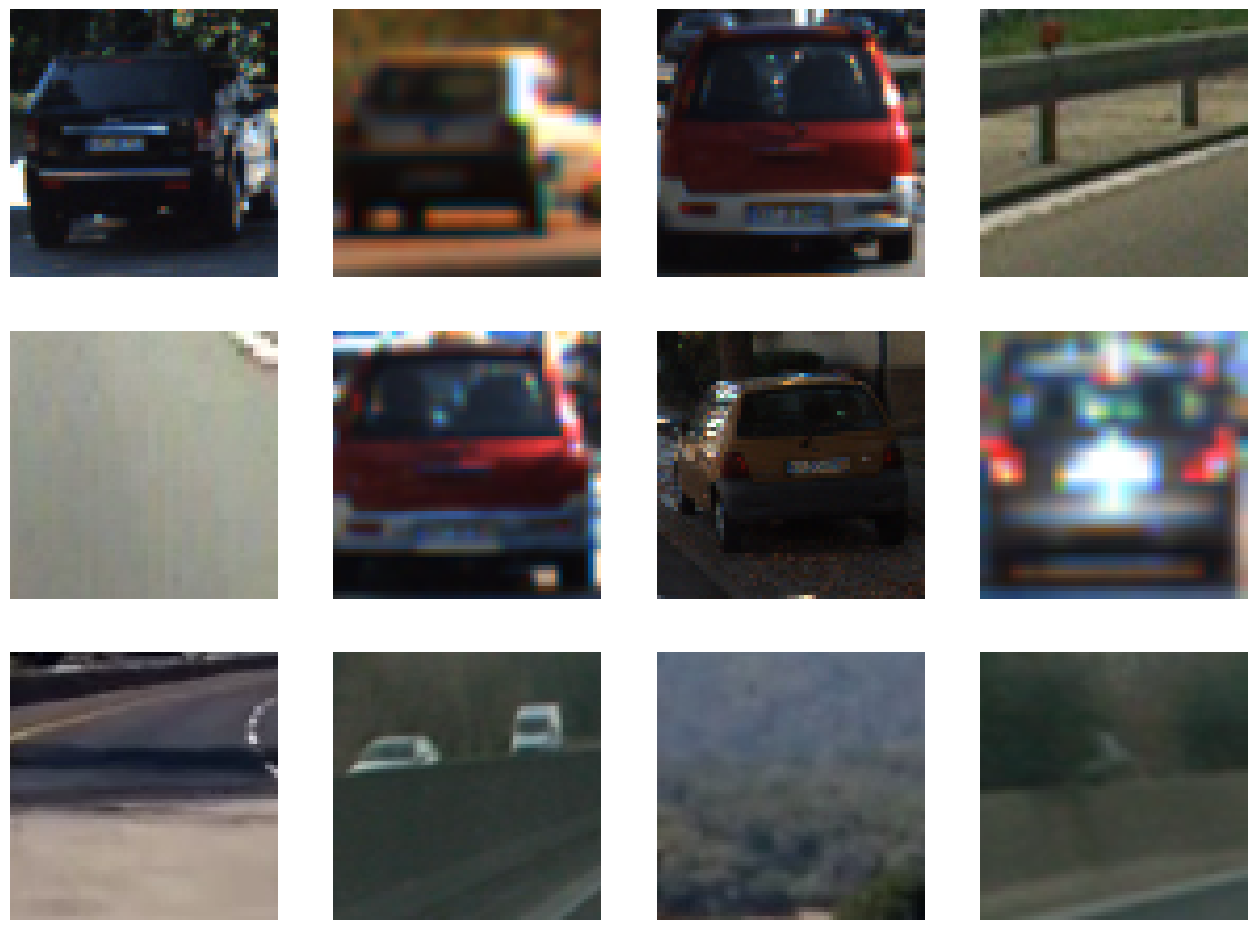

In [7]:
fig = plt.gcf()
fig.set_size_inches(16,16)

next_pix = images_path
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:12]):
    
    sp=plt.subplot(4,4,i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [8]:
print("X data shape : ", x_data.shape)
print("Y data shape : ", y_data.shape)

X data shape :  (17760, 180, 180, 3)
Y data shape :  (17760,)


In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(x_data,y_data,test_size= 0.2, random_state=20)

print("X train data : ", len(X_train))
print("X label data : ", len(X_val))
print("Y test data : ", len(Y_train))
print("Y label data : ", len(Y_val))

X train data :  14208
X label data :  3552
Y test data :  14208
Y label data :  3552


In [10]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180,180,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [11]:
model.compile(optimizer = 'sgd', loss= "binary_crossentropy", metrics=["acc"])

In [12]:
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.3,
    zoom_range=0.3,
    channel_shift_range=0.0,
    fill_mode='nearest')
datagen.fit(X_train)

In [13]:
history = model.fit_generator(datagen.flow(X_train,Y_train,batch_size=32),
                             epochs=2, validation_data= (X_val,Y_val), verbose=1)

C:\Users\mukti\AppData\Local\Temp\ipykernel_16784\589839862.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train,batch_size=32),


Epoch 1/2
444/444 [==============================] - 178s 397ms/step - loss: nan - acc: 0.5027 - val_loss: nan - val_acc: 0.5118
Epoch 2/2
444/444 [==============================] - 176s 396ms/step - loss: nan - acc: 0.5032 - val_loss: nan - val_acc: 0.5118


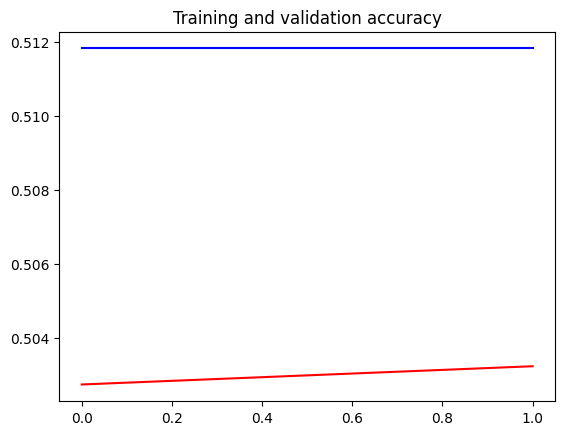

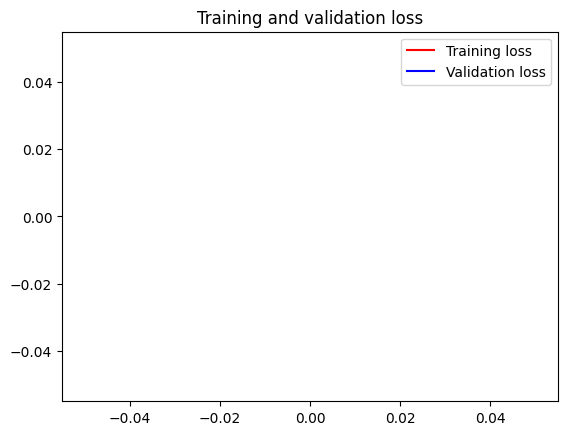

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")

plt.figure()

plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [15]:
pred = model.predict(X_val)
pred

111/111 [==============================] - 8s 74ms/step


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [16]:
test_path = "./data/non-vehicles/extra1001.png"
img_pix1 = cv2.imread(test_path,1)
resize_img_pix1 = cv2.resize(img_pix, (180,180))
rescale_img = np.array(resize_img_pix1) / 255
iimg = np.expand_dims(rescale_img, axis=0)
prediction = model.predict(iimg)

if prediction[0][0]  > 0.5:
    print("Vehical can not be detect")
else:
    print("Vehical detect")

1/1 [==============================] - 0s 75ms/step
Vehical detect
